<a href="https://colab.research.google.com/github/het1752/machine-learning/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data=pd.read_csv('/content/gld_price_data.csv')
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [19]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [20]:
data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [21]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [22]:
data.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [23]:
data.Date.unique()

array(['1/2/2008', '1/3/2008', '1/4/2008', ..., '5/10/2018', '5/14/2018',
       '5/16/2018'], dtype=object)

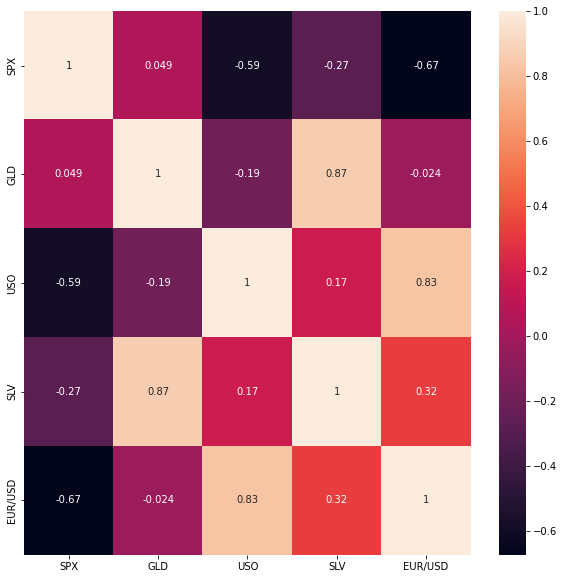

In [24]:
import seaborn as sns
plt.figure(figsize=(10,10))
cor=data.corr()
sns.heatmap(cor,annot=True)

In [25]:
print(cor['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [26]:
data2=data.copy()

In [29]:
X = data.drop(['Date', 'GLD'], axis = 1)
Y = data['GLD']

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [32]:
len(x_train),len(x_test),len(y_train),len(y_test)

(1832, 458, 1832, 458)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model=LinearRegression()

In [35]:
model.fit(x_train,y_train)

LinearRegression()

In [36]:
model.intercept_,model.coef_

(67.45629268976197,
 array([ 6.82770004e-03, -2.56764053e-01,  3.17723486e+00, -8.99975261e+00]))

In [37]:
pred_y=model.predict(x_test)

In [38]:
pred_df=pd.DataFrame({"Actual Value ":y_test,"Predicted Value":pred_y})
pred_df

,Actual Value,Predicted Value
903,168.020004,159.452910
129,81.230003,81.508581
1787,112.320000,113.486804
1913,127.589996,128.551538
2048,119.620003,126.204038
...,...,...
923,166.380005,159.866392
1693,106.379997,111.240450
2054,122.239998,126.454208
658,133.830002,144.935055


In [39]:
pred_df.corr()

,Actual Value,Predicted Value
Actual Value,1.000000,0.931358
Predicted Value,0.931358,1.000000


In [59]:
 from sklearn.metrics import mean_squared_error
 mean_squared_error(y_test,pred_y,squared=False)

8.413614015226472